The goal for this notebook is to learn the in's and out's of using pandas, selecting and manipulating specific data, and visualizing the data. This should all culminate in descriptive analysis of the Chicago City Salaries Data. 

In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
pd.__version__
#  API Reference: http://pandas.pydata.org/pandas-docs/stable/api.html

u'0.17.1'

In [2]:
salaries = pd.read_csv('chicago-salaries.csv')
salaries.head()

,Name,Position Title,Department,Salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,$88968.00
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,$80778.00
2,"AARON, KARINA",POLICE OFFICER,POLICE,$80778.00
3,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,$84780.00
4,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,$104736.00


In [5]:
salaries.columns = ['name','position_title','department','salary']
salaries.columns

Index([u'name', u'position_title', u'department', u'salary'], dtype='object')

In [8]:
salaries.describe()

,name,position_title,department,salary
count,32181,32181,32181,32181
unique,31893,1094,35,1148
top,"PEREZ, JOSE A",POLICE OFFICER,POLICE,$86520.00
freq,4,9489,13570,2493


In [12]:
# index = df['b'].index[df['b'].apply(np.isnan)]
# salaries['salary'].index[salaries['salary'].apply(np.isnan)]
salaries.info()
# Histogram plotting and isnan aren't working because salary is considered a text object and not an int or float
# I need to convert salaries to float. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32181 entries, 0 to 32180
Data columns (total 4 columns):
name              32181 non-null object
position_title    32181 non-null object
department        32181 non-null object
salary            32181 non-null object
dtypes: object(4)
memory usage: 1.2+ MB


In [28]:
# df[['col2','col3']] = df[['col2','col3']].apply(pd.to_numeric)
# can be read as apply this function (pd.to_numeric) to these columns
salaries['salary'].replace(to_replace="$",value="",inplace=True)
# Above attempt is searching for value that equal $, not elements within the value
# df['col1'].apply(function - by default on a row by row basis)
# Below - This will allow me to replace parts of text for datum 
salaries['salary'] = salaries['salary'].apply((lambda x: float(x.replace('$',''))))

In [31]:
salaries['salary'].index[salaries['salary'].apply(np.isnan)]

Int64Index([], dtype='int64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a5fb350>]], dtype=object)

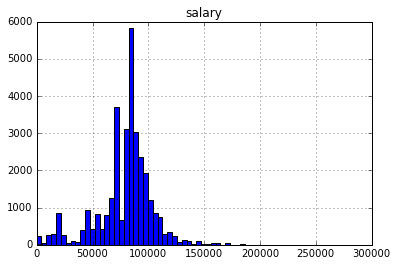

In [37]:
salaries.hist(column = 'salary', bins = 60)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1199269d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12a504d10>]], dtype=object)

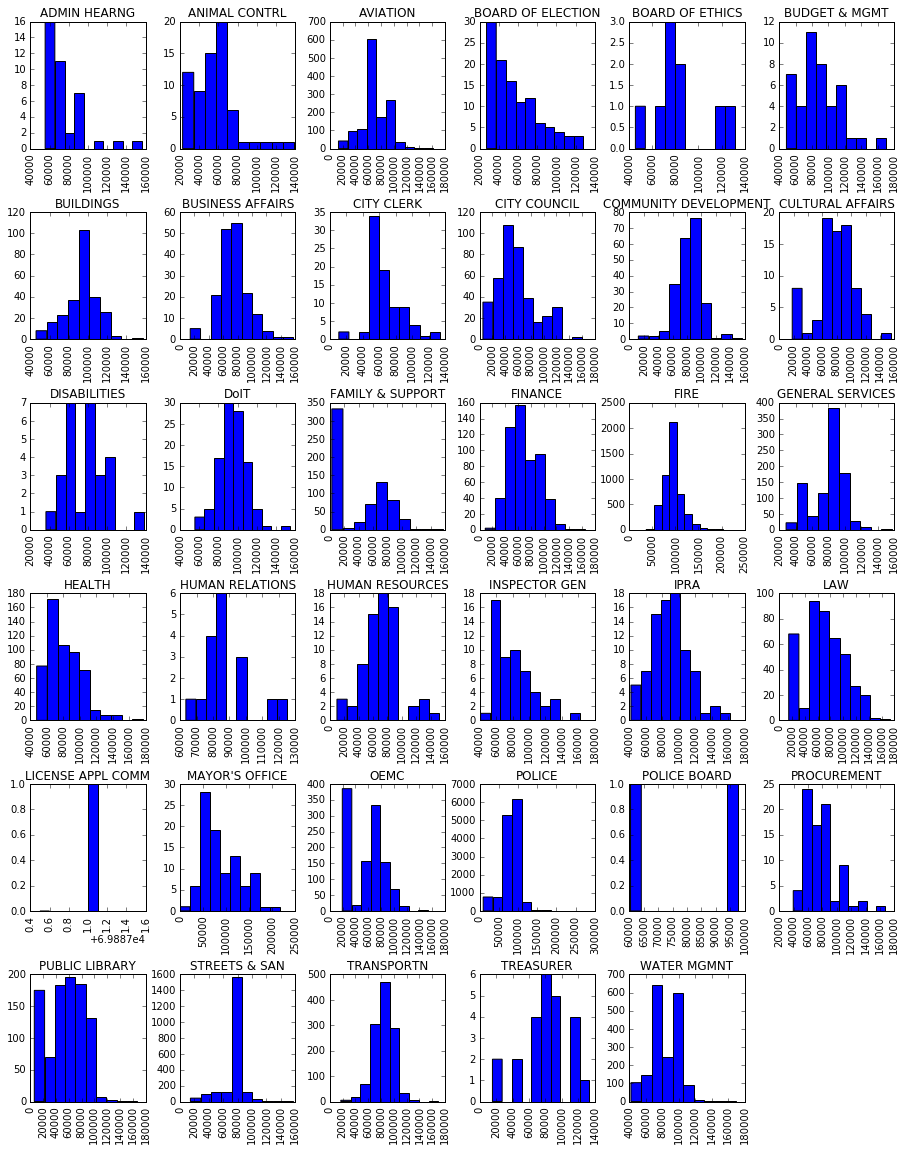

In [44]:
salaries.hist(column = 'salary', by = 'department', bins = 10,figsize = (15,20))
# figsize determines the size of the figure - as a whole - in inch; (width, height) 

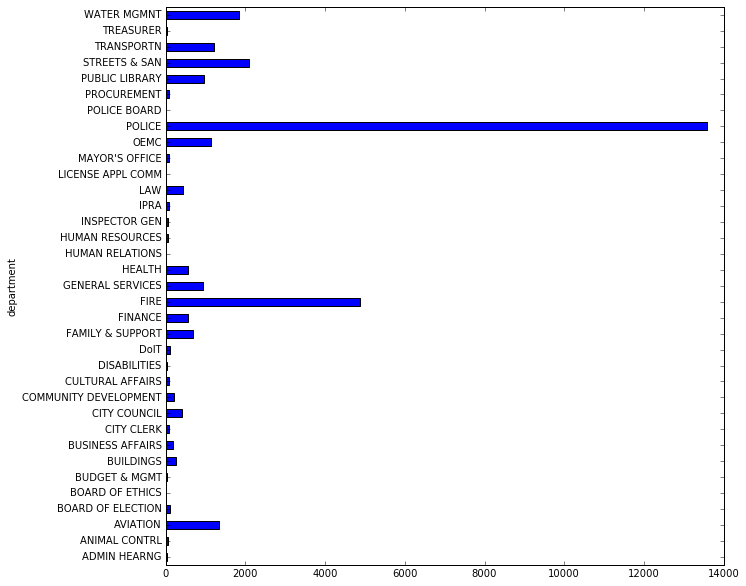

In [82]:
departments = salaries.groupby('department')
departments.position_title.count().plot(kind='barh',figsize=(10,10))

In [99]:
salaries[salaries.position_title == 'POLICE OFFICER'].count(),salaries[salaries.department == 'POLICE'].count()
# departments.salary.sum().plot.pie(subplots = True, figsize=(10,10), )

(name              9489
 position_title    9489
 department        9489
 salary            9489
 dtype: int64, name              13570
 position_title    13570
 department        13570
 salary            13570
 dtype: int64)

In [151]:
#  To find a list of unique values - http://chrisalbon.com/python/pandas_list_unique_values_in_column.html
salaries.position_title[salaries.department == 'POLICE'].nunique()
# Unique number of titles within the Police Department

120

In [155]:
salaries.position_title[(salaries.department == 'POLICE')].unique()
# 
# 
# 
# I've stopped here!!!! I'm trying to figure out how to  change all the Polce Offcer ** to just Polce offcer
# 
# 
# 
salaries.position_title.contains('POLCE OFFCER')

AttributeError: 'Series' object has no attribute 'contains'

In [146]:
salaries['position_title'] = salaries['position_title'].apply((lambda x: x.replace('I','')))
salaries['position_title'] = salaries['position_title'].apply((lambda x: x.replace('II','')))
salaries['position_title'] = salaries['position_title'].apply((lambda x: x.replace('III','')))

In [149]:
#  So let create a bar plot to determine the distribution of employees within the police department by their job title
police_dept = salaries[['position_title','department']][salaries.department == 'POLICE'].groupby(['department','position_title'])
police_dept.head()[:10]

,position_title,department
1,POLCE OFFCER,POLICE
2,POLCE OFFCER,POLICE
9,POLCE OFFCER,POLICE
11,CLERK,POLICE
13,POLCE OFFCER,POLICE
14,POLCE OFFCER,POLICE
21,CROSSNG GUARD,POLICE
51,POLCE OFFCER (ASSGNED AS EVDENCE TECHNCAN),POLICE
74,POLCE OFFCER (ASSGNED AS DETECTVE),POLICE
86,CROSSNG GUARD,POLICE


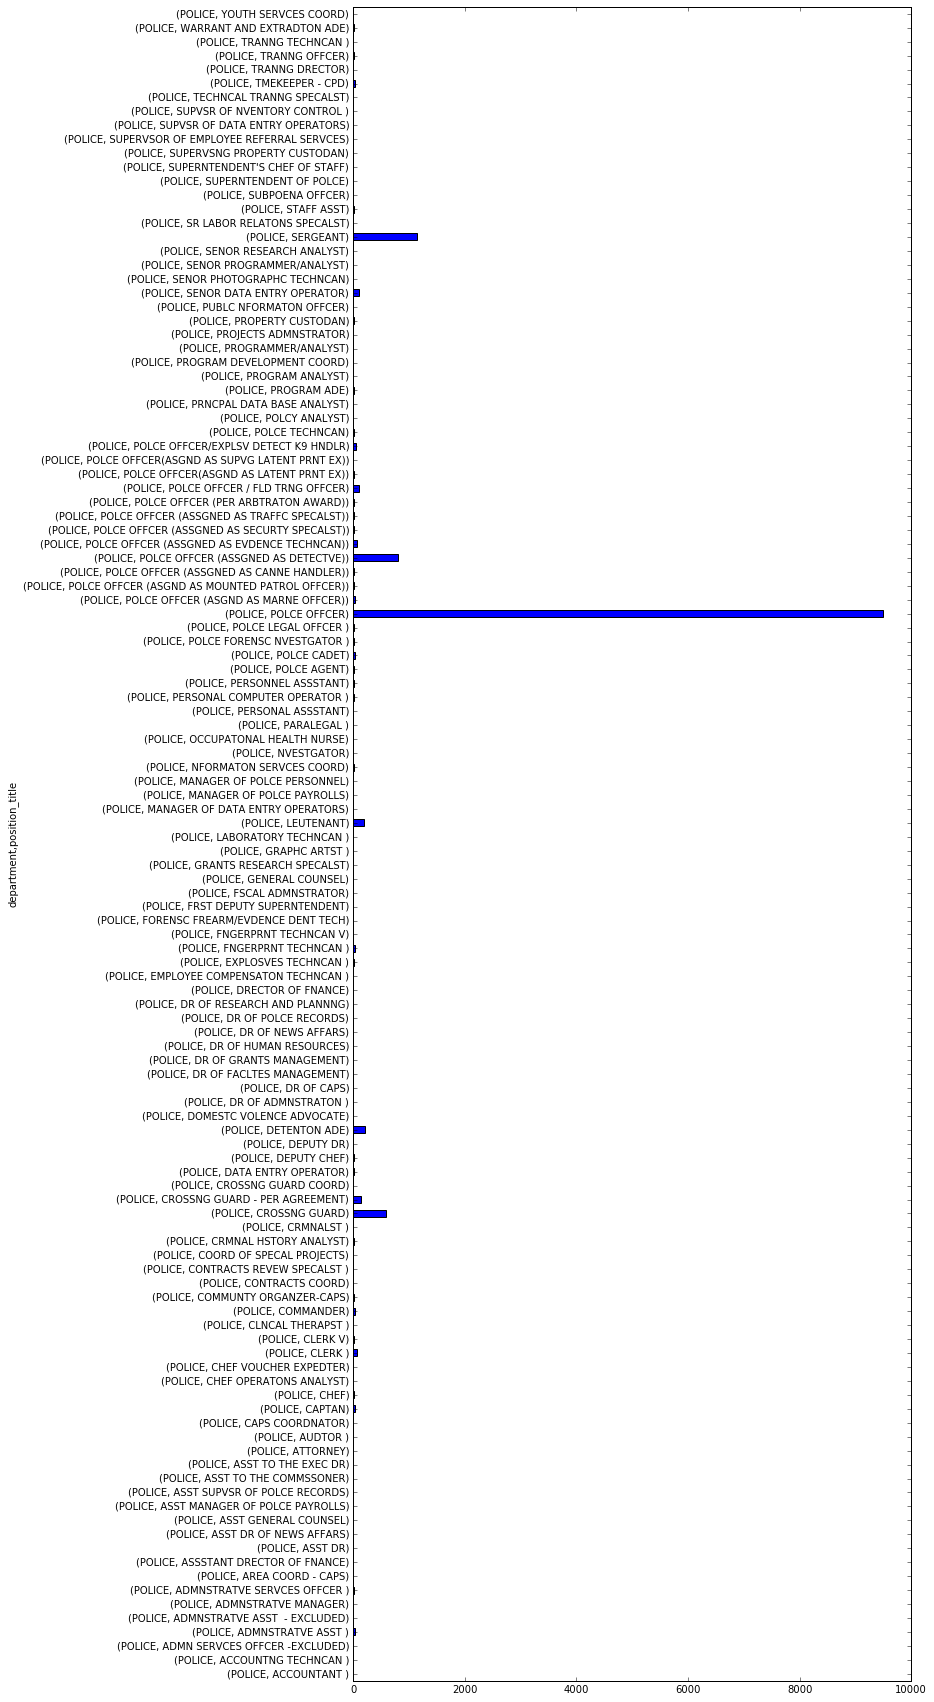

In [150]:
police_dept['position_title'].count().plot(kind='barh',figsize=(10,30))
# departments.position_title.count().plot(kind='barh',figsize=(10,10))